In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


compare the no. of survivors and non-survivors then visualize it using pie chart

In [8]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [10]:
px.pie(df,'Survived')

generate a histogram and boxplot of age distribution

In [11]:
df['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [12]:
px.histogram(df,'Age')

In [13]:
px.box(df,'Age')

count the no of passengers in different classes (Pclass), then visualize it using pie chart

In [6]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [9]:
px.pie(df,'Pclass')

generate a pivot table for gender and pclass and count the survivors and non-survivors

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
t = df.pivot_table(index='Sex',columns='Pclass',values='Survived',aggfunc='count')
t

Pclass,1,2,3
Sex,,,
female,50,30,72
male,57,63,146


In [28]:
px.bar(t)

generate a plotly bar graph showing surviving and non-surviving passengers from each embarked port

In [16]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [17]:
px.bar(df,'Embarked')

In [23]:
E = df.pivot_table(index='Embarked',columns='Pclass',values='Survived',aggfunc='count')
E

Pclass,1,2,3
Embarked,,,
C,56,11,35
Q,1,4,41
S,50,78,142


In [25]:
px.bar(E)

<AxesSubplot: xlabel='Embarked'>

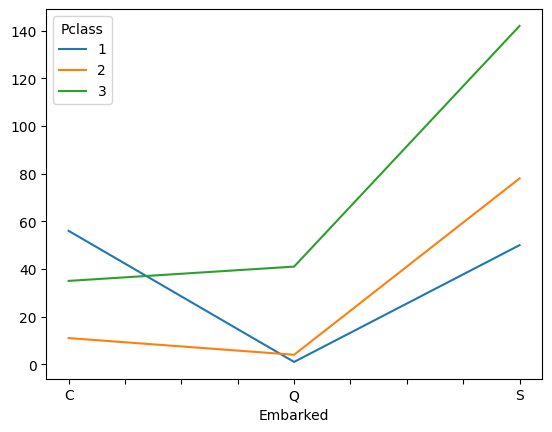

In [24]:
E.plot()

In [30]:
df.groupby(['Survived','Embarked']).sum().reset_index()

C:\Users\rasto\AppData\Local\Temp\ipykernel_14804\599542427.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Survived,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,C,67172,123,1517.50,26,17,3078.3668
1,0,Q,23826,62,325.50,5,1,205.8625
2,0,S,202299,436,4362.91,70,55,4010.6581
3,1,C,44485,60,1331.00,17,22,3680.1292
4,1,Q,26233,70,319.50,4,0,298.1917
5,1,S,95994,196,2194.09,65,69,3583.3293


In [37]:
portwise = df.groupby('Embarked', as_index=False)['Survived'].value_counts()
px.bar(portwise,x='Embarked',y='count',color='Survived')

In [38]:
df2 = px.data.election()

In [39]:
df2

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


In [35]:
df2.head(10)

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


In [41]:
df2.groupby('winner').result.value_counts()

winner    result   
Bergeron  plurality    10
          majority      5
Coderre   plurality    19
          majority     10
Joly      plurality    12
          majority      2
Name: result, dtype: int64